In [44]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from DS_Planck_Unet import load_planck_model, draw_pic_with_mask, draw_pic, val_pix
from DS_healpix_fragmentation import *
from DS_data_transformation import pic2fits
from DS_detector import *
import os
from astropy.coordinates import SkyCoord
from astropy import units as u
from tqdm.notebook import tqdm
from DS_data_transformation import normalize

In [45]:
pix2 = val_pix[0]
pix2

9

In [46]:
cat = pd.read_csv('/home/rt2122/Data/detected_cats/full_pz14_thr0.1_step8.csv')
cat = cat[cat['status'] == 'tp']
cat = cat[cat['catalog'] == 'planck_z']
cat = cat[radec2pix(cat['tRA'], cat['tDEC'], 2) == pix2]
cat.index = np.arange(len(cat))
cat.shape

(28, 12)

In [47]:
size = 16

In [48]:
coords = np.stack([cat['tRA'], cat['tDEC']]).T
coords.shape

(28, 2)

In [49]:
matr = one_pixel_fragmentation(2, pix2, 10)

In [50]:
mdict = matr2dict(matr)

In [51]:
pz_model = load_planck_model('/home/rt2122/Models/pz_only/pz_only.ep0014-vl0.006663-l0.004144.hdf5')
act_model = load_planck_model('/home/rt2122/Models/act_ros/act_ros.ep0010-vl0.034228-l0.031086.hdf5')

In [52]:
pz_data_dict = gen_pics_for_detection(pix2, pz_model, step=8)
pz_connected = connect_masks(pz_data_dict['ans'], pz_data_dict['pic_idx'])
del pz_data_dict

In [53]:
act_data_dict = gen_pics_for_detection(pix2, act_model, step=8)
act_connected = connect_masks(act_data_dict['ans'], act_data_dict['pic_idx'])
del act_data_dict

In [54]:
pic, mask = draw_pic_with_mask(None, coords, matr=matr)
ypic = draw_pic(matr, y=True)

In [55]:
def pic9(idx): 
    x, y = mdict[radec2pix(*coords[idx], 2**11)]
    sm_pic = pic[x-size:x+size, y-size:y+size]
    sm_mask = mask[x-size:x+size, y-size:y+size]
    sm_pz = pz_connected[x-size:x+size, y-size:y+size]
    sm_act = act_connected[x-size:x+size, y-size:y+size]
    s = 80
    _, ax = plt.subplots(3, 3, figsize=(14, 14), sharex=True, sharey=True)
    plt.subplots_adjust(wspace=0.01, hspace=0.05)
    for i in range(2):
        for j in range(3):
            ax[i][j].imshow(sm_pic[:,:,3*i+j])
    for i in range(3):
        for j in range(3):
            ax[i][j].scatter([size], [size], marker='x', c='r', s=s)
    ax[2][0].imshow(sm_mask[:,:,0])
    ax[2][1].imshow(sm_pz[:,:,0])
    ax[2][2].imshow(sm_act[:,:,0])

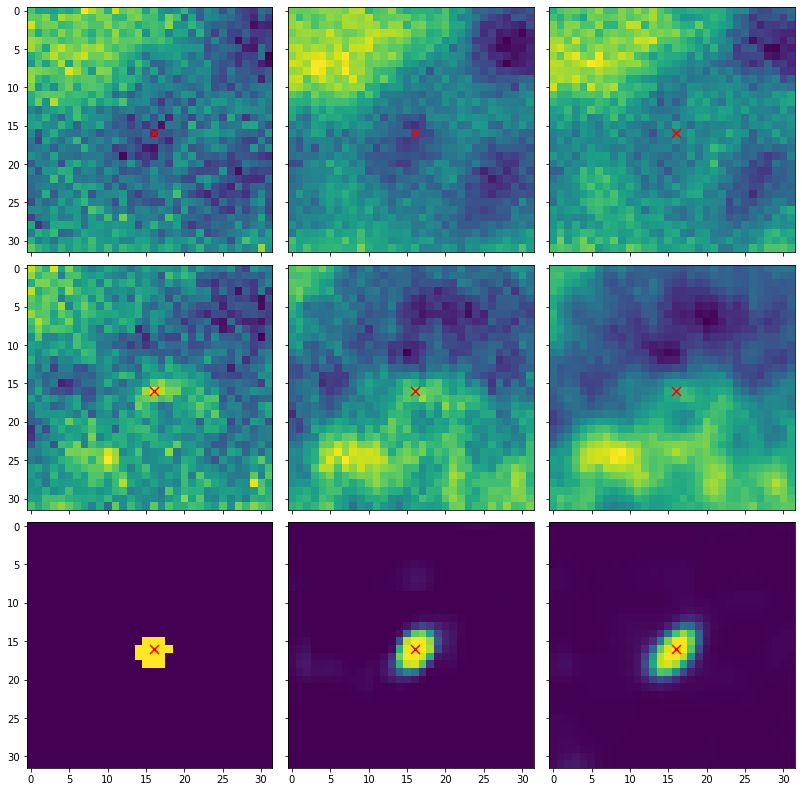

In [64]:
pic9(8)

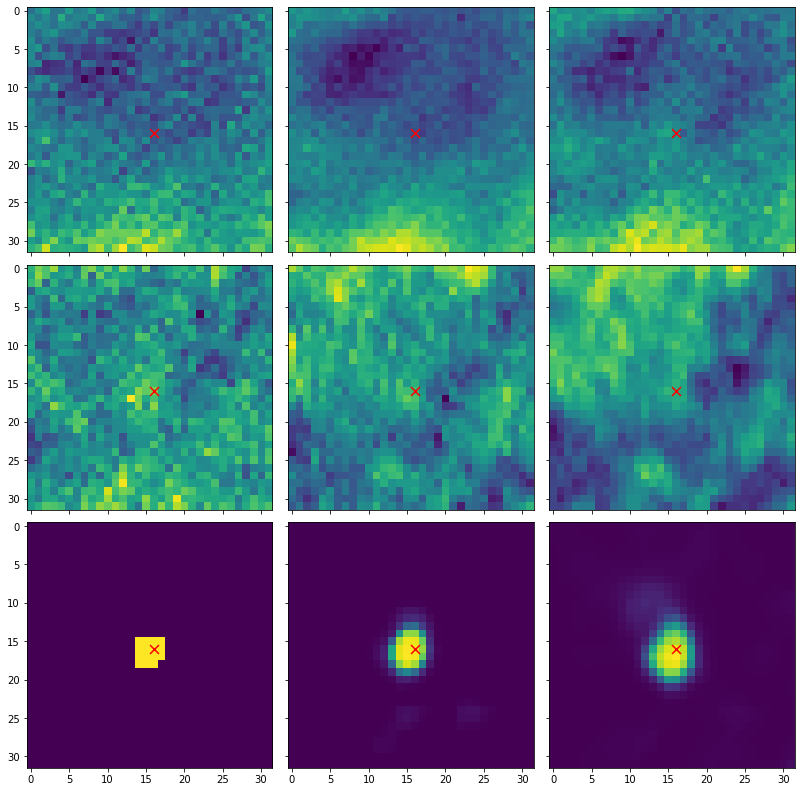

In [68]:
pic9(12)

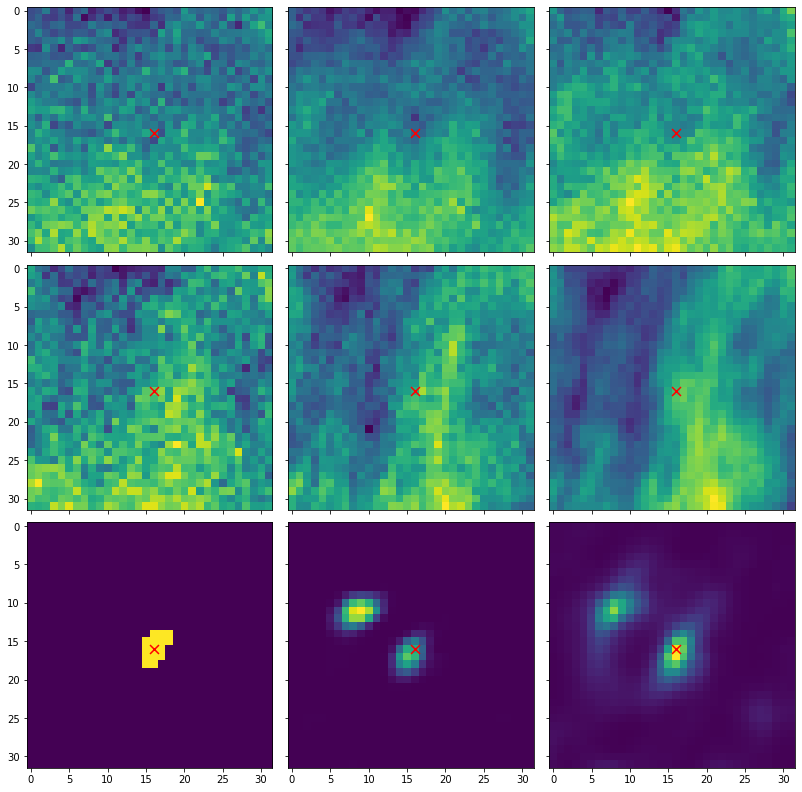

In [71]:
pic9(15)

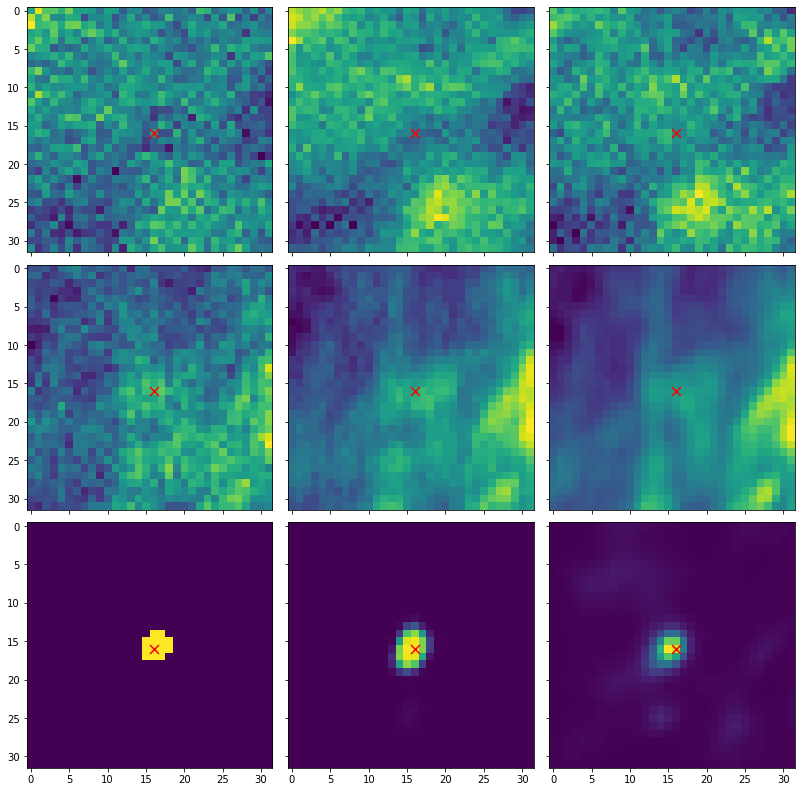

In [73]:
pic9(17)

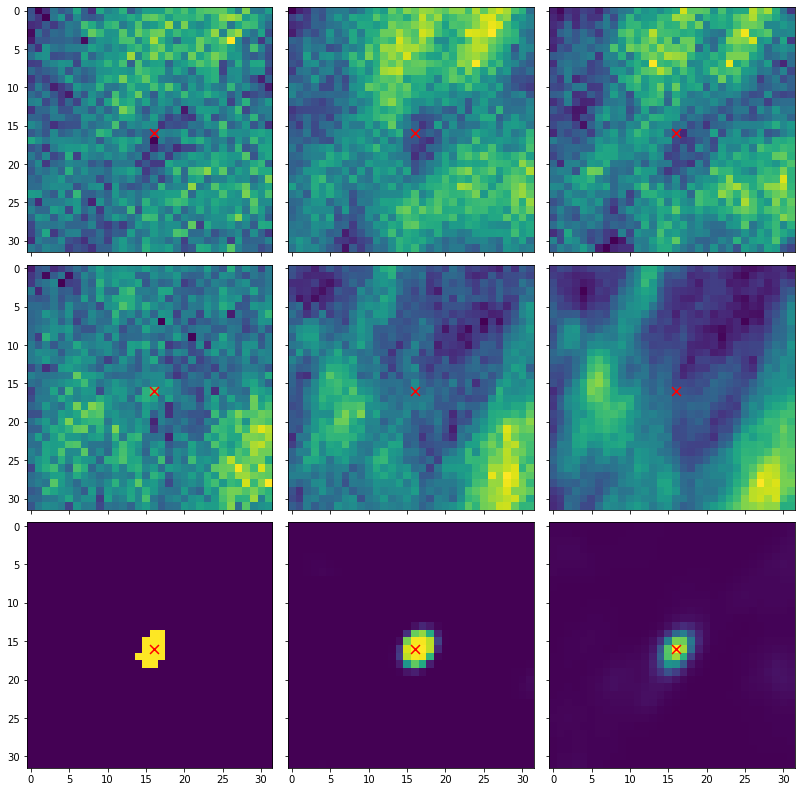

In [75]:
pic9(19)